In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
salariesDC = pd.read_csv("ds_salaries.csv")
np.random.seed(0)

In [42]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
return false;
}

<IPython.core.display.Javascript object>

# CLEAN
***

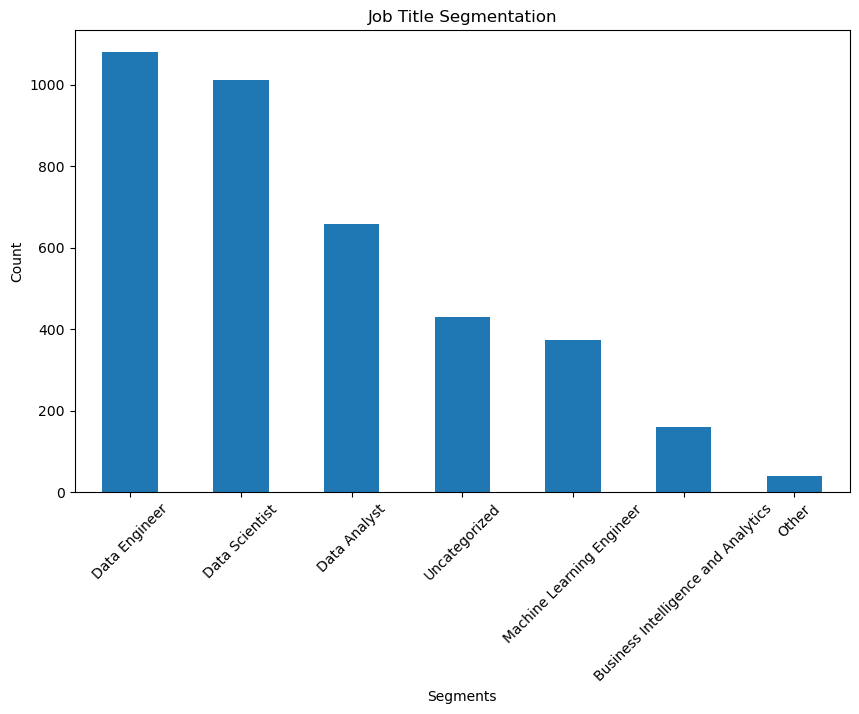

In [43]:
def segment_job_title(job_title):
    data_scientist_titles = ['Principal Data Scientist', 'Data Scientist','Applied Scientist', 'Research Scientist', 'Applied Data Scientist', 'Lead Data Scientist', 'Staff Data Scientist', 'Principal Data Analyst','Principal Data Engineer']
    machine_learning_titles = ['ML Engineer', 'Machine Learning Engineer','Applied Machine Learning Engineer', 'Machine Learning Researcher','Machine Learning Scientist', 'Autonomous Vehicle Technician', 'AppliedMachine Learning Scientist', 'Principal Machine Learning Engineer','Machine Learning Developer', 'Lead Machine Learning Engineer', 'Machine Learning Manager']
    data_analyst_titles = ['Data Analyst', 'Data Quality Analyst','Compliance Data Analyst', 'Business Data Analyst', 'Staff Data Analyst','Lead Data Analyst', 'BI Data Analyst', 'Marketing Data Analyst', 'Finance Data Analyst']
    data_engineer_titles = ['Data Modeler', 'Data Engineer', 'ETL Engineer', 'Data DevOps Engineer', 'Big Data Engineer', 'Data Infrastructure Engineer', 'Software Data Engineer', 'Cloud Database Engineer', 'Cloud Data Engineer', 'Cloud Data Architect', 'Lead Data Engineer', 'Principal Data Engineer']
    bi_analytics_titles = ['Data Analytics Manager', 'Business Intelligence Engineer', 'Analytics Engineer', 'BI Data Engineer','Director of Data Science', 'BI Developer', 'Insight Analyst', 'Data Analytics Specialist', 'Data Analytics Lead', 'Power BI Developer', 'Cloud Data Architect']
    other_titles = ['Data Strategist', 'Computer Vision Engineer', 'AI Developer', 'Head of Data']
    if job_title in data_scientist_titles:
        return 'Data Scientist'
    elif job_title in machine_learning_titles:
        return 'Machine Learning Engineer'
    elif job_title in data_analyst_titles:
        return 'Data Analyst'
    elif job_title in data_engineer_titles:
        return 'Data Engineer'
    elif job_title in bi_analytics_titles:
        return 'Business Intelligence and Analytics'
    elif job_title in other_titles:
        return 'Other'
    else:
        return 'Uncategorized'
    
segmented_titles = salariesDC['job_title'].apply(segment_job_title)
segment_counts = segmented_titles.value_counts()

plt.figure(figsize=(10, 6))
segment_counts.plot(kind='bar')
plt.title('Job Title Segmentation')
plt.xlabel('Segments')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [44]:
def add_continent_column(df):
    continent_mapping = {
        'AE': 'Asia',
        'AL': 'Europe',
        'AM': 'Asia',
        'AR': 'South America',
        'AS': 'Oceania',
        'AT': 'Europe',
        'AU': 'Oceania',
        'BA': 'Europe',
        'BE': 'Europe',
        'BO': 'South America',
        'BR': 'South America',
        'BS': 'North America',
        'CA': 'North America',
        'CF': 'Africa',
        'CH': 'Europe',
        'CL': 'South America',
        'CN': 'Asia',
        'CO': 'South America',
        'CR': 'North America',
        'CZ': 'Europe',
        'DE': 'Europe',
        'DK': 'Europe',
        'DZ': 'Africa',
        'EE': 'Europe',
        'EG': 'Africa',
        'ES': 'Europe',
        'FI': 'Europe',
        'FR': 'Europe',
        'GB': 'Europe',
        'GH': 'Africa',
        'GR': 'Europe',
        'HK': 'Asia',
        'HN': 'North America',
        'HR': 'Europe',
        'HU': 'Europe',
        'ID': 'Asia',
        'IE': 'Europe',
        'IL': 'Asia',
        'IN': 'Asia',
        'IQ': 'Asia',
        'IR': 'Asia',
        'IT': 'Europe',
        'JP': 'Asia',
        'KE': 'Africa',
        'LT': 'Europe',
        'LU': 'Europe',
        'LV': 'Europe',
        'MA': 'Africa',
        'MD': 'Europe',
        'MK': 'Europe',
        'MT': 'Europe',
        'MX': 'North America',
        'MY': 'Asia',
        'NG': 'Africa',
        'NL': 'Europe',
        'NZ': 'Oceania',
        'PH': 'Asia',
        'PK': 'Asia',
        'PL': 'Europe',
        'PR': 'North America',
        'PT': 'Europe',
        'RO': 'Europe',
        'RU': 'Europe',
        'SE': 'Europe',
        'SG': 'Asia',
        'SI': 'Europe',
        'SK': 'Europe',
        'TH': 'Asia',
        'TR': 'Asia',
        'UA': 'Europe',
        'US': 'North America',
        'VN': 'Asia'
    }

    df['Country Code'] = df['company_location'].str.strip()
    df['Country Code'] = df['Country Code'].apply(lambda x: x.split(',')[0])
    df['Continent'] = df['Country Code'].map(continent_mapping)
    df.drop('company_location', axis=1, inplace=True)
    return df

# Assuming 'salariesDC' is your dataset
salariesDC = add_continent_column(salariesDC)
salariesDC.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_size,Country Code,Continent
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,L,ES,Europe
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,S,US,North America
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,S,US,North America
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,M,CA,North America
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,M,CA,North America


In [45]:
salariesDC.drop('salary_currency', axis=1, inplace=True)
salariesDC.drop(['Country Code'], axis=1, inplace=True)
salariesDC.drop(['salary'], axis=1, inplace=True)
salariesDC.head()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_size,Continent
0,2023,SE,FT,Principal Data Scientist,85847,ES,100,L,Europe
1,2023,MI,CT,ML Engineer,30000,US,100,S,North America
2,2023,MI,CT,ML Engineer,25500,US,100,S,North America
3,2023,SE,FT,Data Scientist,175000,CA,100,M,North America
4,2023,SE,FT,Data Scientist,120000,CA,100,M,North America


In [46]:
label_encoder = LabelEncoder()
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'Continent', 'company_size','employee_residence']
salariesDC[categorical_columns] = salariesDC[categorical_columns].apply(lambda x: label_encoder.fit_transform(x))

In [47]:
X = salariesDC.drop('salary_in_usd', axis=1)  
y = salariesDC['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'Continent', 'company_size']
onehot_encoder = OneHotEncoder(drop='first', sparse=False)
X_encoded = pd.DataFrame(onehot_encoder.fit_transform(X[categorical_columns]))

X_encoded.columns = onehot_encoder.get_feature_names_out(categorical_columns)
X_encoded = pd.concat([X_encoded, X.select_dtypes(include=['float64'])], axis=1)

In [49]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10]
}
 
# Create a decision tree classifier
model = RandomForestRegressor()

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameter and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(best_params)
print(best_score)

{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 300}
0.402736832581732
